<a href="https://colab.research.google.com/github/Aditya-titus/Machine-learning/blob/main/Basic_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
np.random.seed(0)

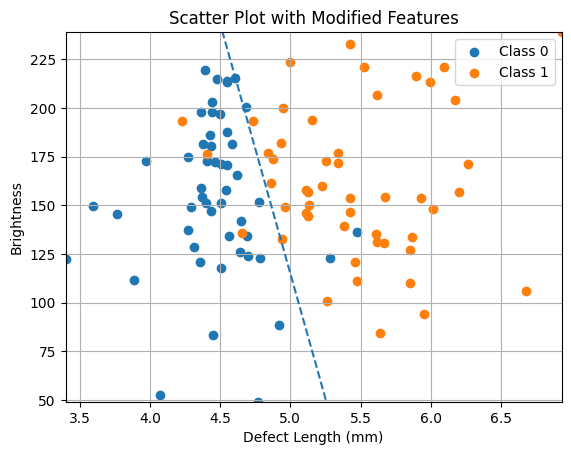

In [4]:
# Tutorial 1 part 1

X,y = datasets.make_classification(n_samples = 100,n_features = 2,n_informative = 2,n_redundant = 0)

# X, y = make_classification(
#     n_samples=100,
#     n_features=2,
#     n_informative=2,  # Number of informative features
#     n_redundant=0,    # Number of redundant features
#     n_classes=2,
#     n_clusters_per_class=2,
# )


# Modify the features as specified
X[:, 0] = np.abs(X[:, 0] * 0.5 + 5)
X[:, 1] = np.abs(X[:, 1] * 30 + 160)

fig, ax = plt.subplots()

# Create a scatter plot for Class 0 (y == 0)
ax.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')

# Create a scatter plot for Class 1 (y == 1)
ax.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')

# Add labels and a legend
plt.xlabel("Defect Length (mm)")
plt.ylabel("Brightness")
plt.title("Scatter Plot with Modified Features")
plt.legend()

# Determine the lowest and highest values of X for scaling
x1_min = np.min(X[:, 0])
x1_max = np.max(X[:, 0])

x1 = np.linspace(x1_min, x1_max, 100)

# Calculate x2 values based on the equation x2 = -280x1 + 1400
x2 = -257 * x1 + 1400

# # Create the plot for the curve
plt.plot(x1, x2, linestyle='--')

# Set suitable axis limits
plt.xlim(x1_min, x1_max)
plt.ylim(np.min(X[:,1]),np.max(X[:,1]))

# Show the plot
plt.grid(True)
# plt.show()


In [9]:
# Tutorial 1 Task 2

def get_cov(sdx = 1, sdy = 1, rotangdeg = 0):
  covar = np.array([[sdx**2,0],[0,sdy**2]])
  rotang = rotangdeg / 360 * 2 * np.pi
  rot_matrix = np.array([[np.cos(rotang), -np.sin(rotang)],[np.sin(rotang), np.cos(rotang)]]) #rotational matrix with angle defined above
  covar = np.matmul(np.matmul(rot_matrix, covar), rot_matrix.T)  #matmul is matrix multiplication
  return covar

# Example usage:
sdx = 1
sdy = 3
rot_angle_degrees = 30  # Rotate by 30 degrees
covariance_matrix = get_cov(sdx, sdy, rot_angle_degrees)
print(covariance_matrix)

[[ 3.         -3.46410162]
 [-3.46410162  7.        ]]


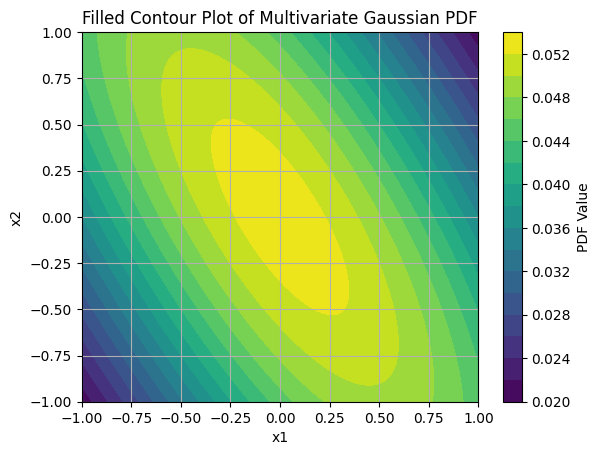

In [13]:
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line


Xgrid, x1line, x2line = gen_sample_grid(200,200,1)

# Function to calculate the PDF using the covariance matrix and sample grid
def calculate_pdf(Xgrid, covariance_matrix):
    det_covariance = np.linalg.det(covariance_matrix)
    inv_covariance = np.linalg.inv(covariance_matrix)

    pdf = 1 / (2 * np.pi * np.sqrt(det_covariance)) * np.exp(
        -1/2 * np.sum(np.matmul(Xgrid, inv_covariance) * Xgrid, axis=1)
    )

    return pdf

# Calculate the PDF using your function
pdf_values = calculate_pdf(Xgrid, covariance_matrix)

# Reshape the PDF values to match the grid shape
pdf_values = pdf_values.reshape(x1line.shape[0], x2line.shape[0])

# Create a filled contour plot of the PDF
contour = plt.contourf(x1line, x2line, pdf_values, cmap='viridis', levels=20)
plt.colorbar(contour, label="PDF Value")

# Show the plot
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Filled Contour Plot of Multivariate Gaussian PDF")
plt.grid(True)
plt.show()
